<a href="https://colab.research.google.com/github/Harsh-0-7/Exploratory-Analysis-of-Geolocational-Data/blob/main/Exploratory_Analysis_of_Geolocational_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install kaggle
!pip install -q kaggle 

In [2]:
#To upload kaggle.json file from local system
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harshhiteshshah","key":"f440ed8d6c77219d1373613b4fd3d6eb"}'}

In [3]:
#create directory
!mkdir ~/.kaggle

In [4]:
#copy json file to kaggle folder
!cp kaggle.json ~/.kaggle/

In [5]:
#Change premission of json file to act
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# To list all dataset in kaggle
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-09-15 20:16:36          12318  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           7458  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3086  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2913  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [7]:
#Downloading Required Dataset from kaggle
! kaggle datasets download -d borapajo/food-choices

 95% 5.00M/5.25M [00:00<00:00, 40.4MB/s]
100% 5.25M/5.25M [00:00<00:00, 33.5MB/s]


In [8]:
#Unzipping .zip file
!unzip food-choices.zip

Archive:  food-choices.zip
  inflating: codebook_food.docx      
  inflating: food_coded.csv          


In [9]:
import pandas as pd
import numpy as np
full_dataset=pd.read_csv("food_coded.csv");
print(full_dataset.head())
print(full_dataset.info())
#print(full_dataset.describe())

     GPA  Gender  ...  waffle_calories                    weight
0    2.4       2  ...             1315                       187
1  3.654       1  ...              900                       155
2    3.3       1  ...              900  I'm not answering this. 
3    3.2       1  ...             1315             Not sure, 240
4    3.5       1  ...              760                       190

[5 rows x 61 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffe

In [10]:
relevent=full_dataset[['cook','eating_out','employment','ethnic_food','exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']]
missing_values_count = relevent.isnull().sum()
print(missing_values_count)
# how many total missing values do we have?
total_cells = np.product(relevent.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)



cook              3
eating_out        0
employment        9
ethnic_food       0
exercise         13
fruit_day         0
income            1
on_off_campus     1
pay_meal_out      0
sports            2
veggies_day       0
dtype: int64
2.109090909090909


In [11]:
#As percent missing is less than 5%,we are dropping rows containing missing values.
relevent_with_no_na=relevent.dropna(axis=0)
print(relevent_with_no_na.shape[0])

100


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

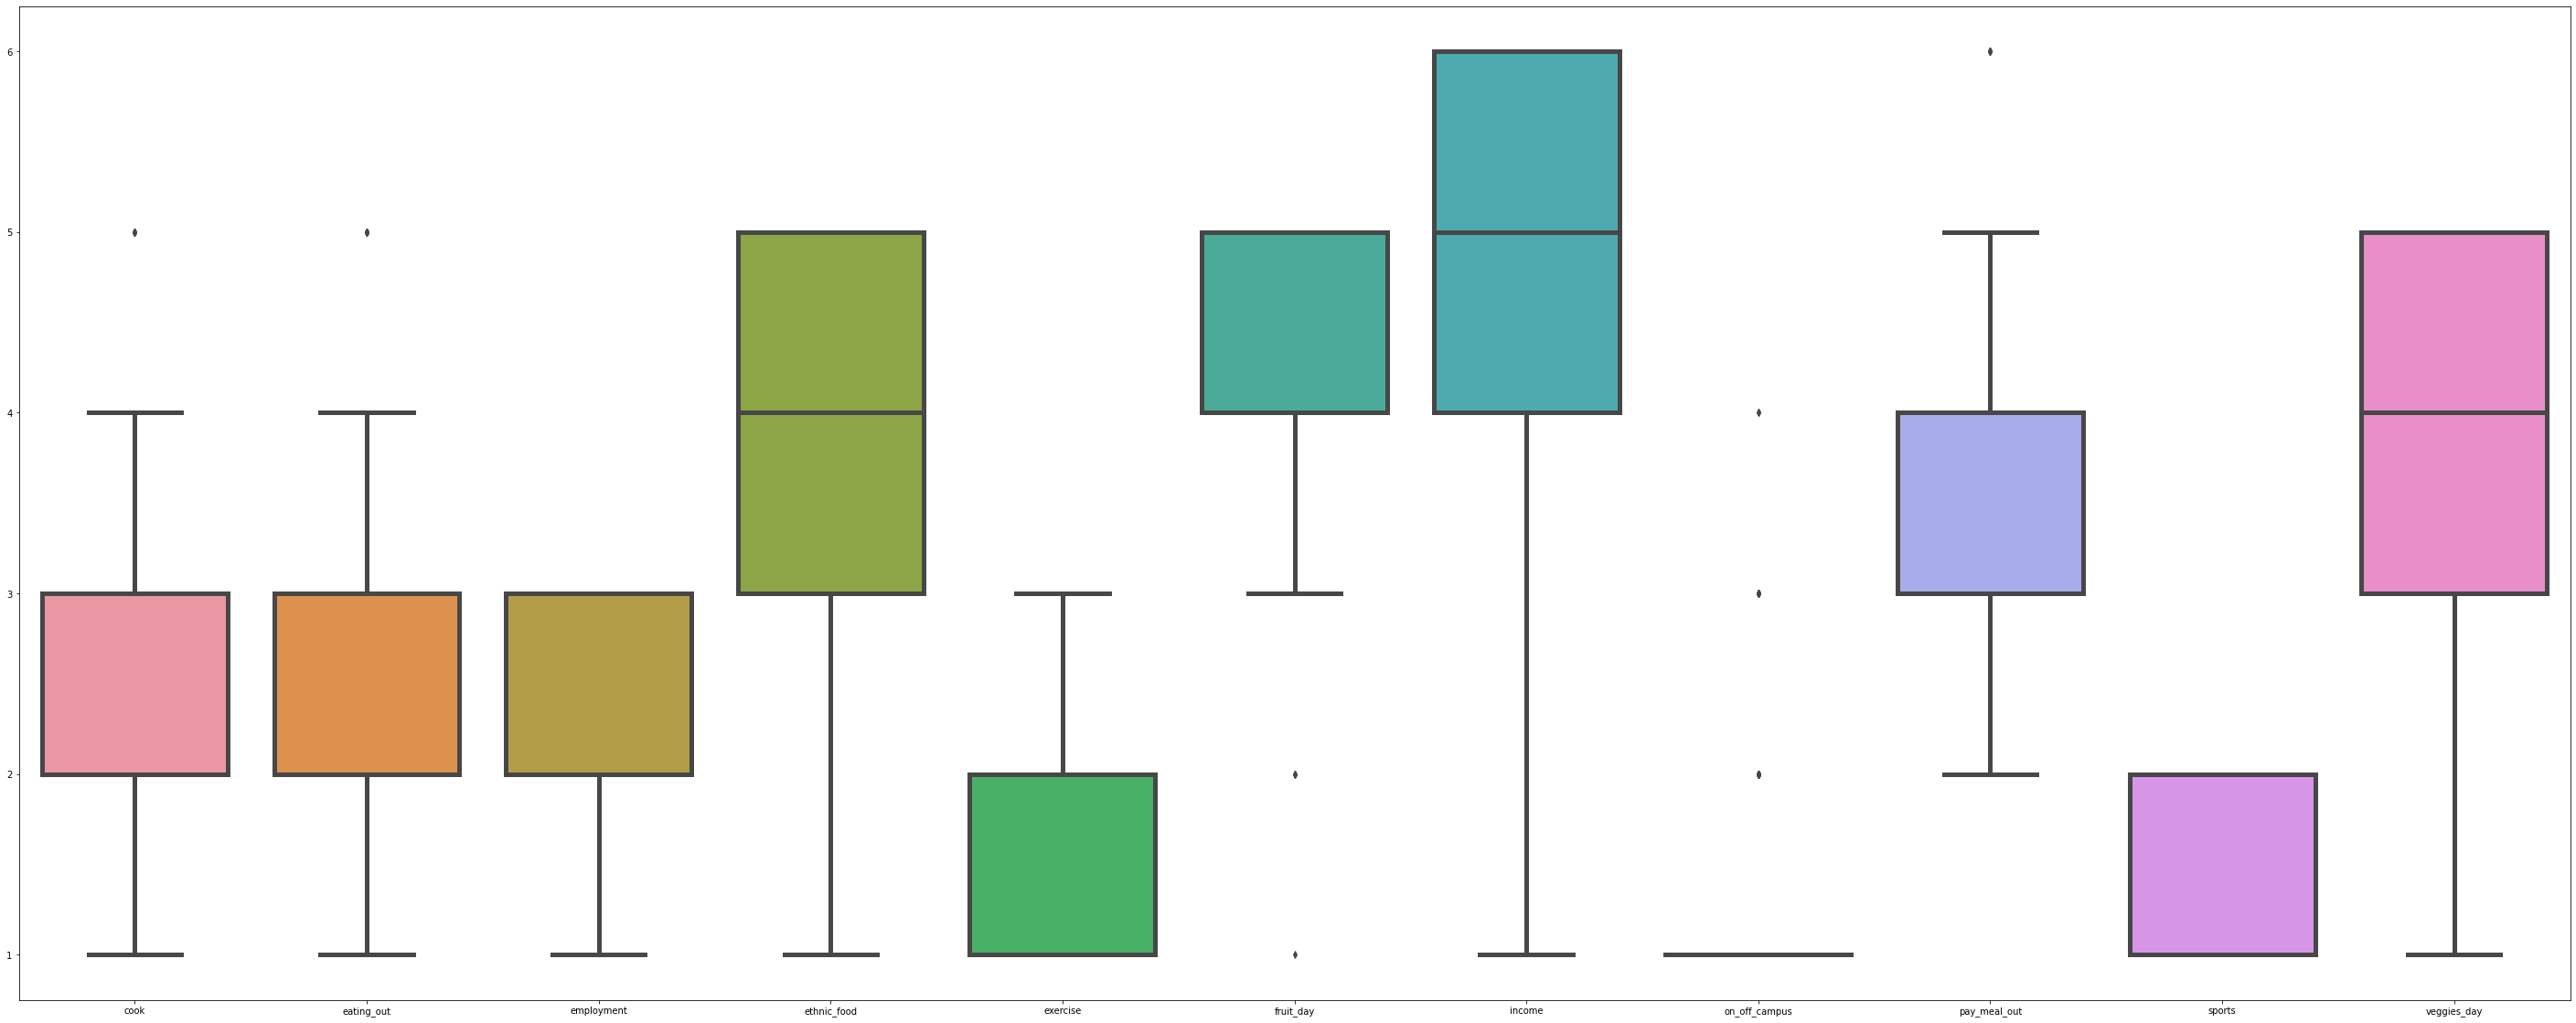

In [13]:
fig = plt.figure(figsize =(50, 20))
 
# Creating plot
ax=sns.boxplot(data=relevent_with_no_na,linewidth=5)

# show plot
plt.show()

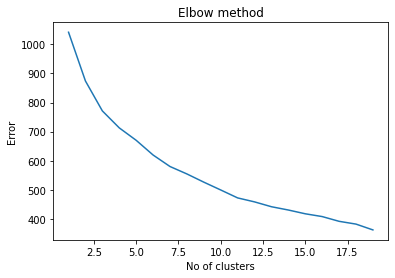

In [15]:
Error =[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i).fit(relevent_with_no_na)
    kmeans.fit(relevent_with_no_na)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 20), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [18]:
import folium as f
import json
import requests

In [37]:
f.Map(location=(latitude,longitude))

In [87]:
CLIENT_ID='YVXU3P2WSRWZAFQPVSSO3HHUVWZ5TIMEW1NNKENYURXHMMKD'
CLIENT_SECRET='Q3ABL5LX1B2AXBEOTM3AIL3NM2DYAJ2JEYJNFMPHYWZJRXHR'
search_query = 'Apartment' #Search for residential locations
radius = 18000 #Set the radius to 18 kilometres due to traffic constraints
latitude=13.13 #College location
longitude=77.56
VERSION = '20180604'
LIMIT = 200

In [88]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,latitude, longitude, VERSION, search_query,radius,LIMIT)


In [89]:
results = requests.get(url).json()

In [90]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
from pandas.io.json import json_normalize
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.neighborhood
0,51319d59e4b04a7c6799abe4,GK Lakeview Apartment,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1631950178,False,Ananthapura Road,Yelahanka New Town,13.114882,77.563090,"[{'label': 'display', 'lat': 13.11488202331476...",1715,560064,IN,Bangalore,Karnātaka,India,"[Ananthapura Road (Yelahanka New Town), Bangal...",NaN
1,4db7040e0437fa536a641766,Apartment Banaswadi main road cross hight stre...,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1631950178,False,Banaswadi Main Rd,hight street,13.000170,77.624545,"[{'label': 'display', 'lat': 13.00017043034296...",16058,NaN,IN,Bangalore,Karnātaka,India,"[Banaswadi Main Rd (hight street), Bangalore, ...",NaN
2,56133261498e95c619c830f8,Dwellington Apartment,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1631950178,False,NaN,NaN,13.039492,77.555590,"[{'label': 'display', 'lat': 13.03949179789228...",10086,NaN,IN,Bangalore,Karnātaka,India,"[Bangalore, Karnātaka, India]",NaN
3,56ac9283498e7cbb284553da,Shriram Suhaana Apartments,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1631950178,False,NaN,NaN,13.134563,77.572646,"[{'label': 'display', 'lat': 13.13456280998398...",1462,NaN,IN,NaN,NaN,India,[India],NaN
4,573a06fc498ed9e519ca0969,"1/747, Rented Apartment","[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",v-1631950178,False,"1/747, 1st Cross, Beside Karvy Building",Krishna Temple Road,12.979005,77.645620,"[{'label': 'display', 'lat': 12.979005, 'lng':...",19202,560038,IN,Bangalore,Karnātaka,India,"[1/747, 1st Cross, Beside Karvy Building (Kris...",NaN


In [91]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
#print(dataframe_filtered.columns)
dataframe_filtered.drop([4,17,18],axis=0,inplace=True) #remove some unwanted locations like hotels
dataframe_filtered.drop(['cc','country','state','city'],axis=1,inplace=True) #no need for those columns as we know we're in Bangalore,IN
dataframe_filtered.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,formattedAddress,neighborhood,id
0,GK Lakeview Apartment,Residential Building (Apartment / Condo),Ananthapura Road,Yelahanka New Town,13.114882,77.563090,"[{'label': 'display', 'lat': 13.11488202331476...",1715,560064,"[Ananthapura Road (Yelahanka New Town), Bangal...",NaN,51319d59e4b04a7c6799abe4
1,Apartment Banaswadi main road cross hight stre...,Residential Building (Apartment / Condo),Banaswadi Main Rd,hight street,13.000170,77.624545,"[{'label': 'display', 'lat': 13.00017043034296...",16058,NaN,"[Banaswadi Main Rd (hight street), Bangalore, ...",NaN,4db7040e0437fa536a641766
2,Dwellington Apartment,Residential Building (Apartment / Condo),NaN,NaN,13.039492,77.555590,"[{'label': 'display', 'lat': 13.03949179789228...",10086,NaN,"[Bangalore, Karnātaka, India]",NaN,56133261498e95c619c830f8
3,Shriram Suhaana Apartments,Residential Building (Apartment / Condo),NaN,NaN,13.134563,77.572646,"[{'label': 'display', 'lat': 13.13456280998398...",1462,NaN,[India],NaN,56ac9283498e7cbb284553da
5,Shree Prakriti Apartment,Residential Building (Apartment / Condo),NaN,NaN,13.064801,77.572098,"[{'label': 'display', 'lat': 13.06480088033049...",7375,NaN,[India],NaN,552e828d498efbc5456866e9


In [92]:
#define coordinates of the college
map_bang=f.Map(location=[12.971599,77.594566],zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
locations = f.map.FeatureGroup()

latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
labels = list(dataframe_filtered.name)

for lat, lng, label in zip(latitudes, longitudes, labels):
    f.Marker([lat, lng], popup=label).add_to(map_bang)    
    
# add incidents to map
map_bang.add_child(locations)

# add incidents to map
map_bang.add_child(locations)

map_bang

In [93]:
df_evaluate=dataframe_filtered[['lat','lng']]

In [94]:
RestList=[]
latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
for lat, lng in zip(latitudes, longitudes):    
    radius = 5000 #Set the radius to 5 kilometres for convenience
    latitude=lat#Query for the apartment location in question
    longitude=lng
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    search_query = 'Restaurant' #Search for any food related locations
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe2 = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe2.columns if col.startswith('location.')] + ['id']
    dataframe_filtered2 = dataframe2.loc[:, filtered_columns]
    # filter the category for each row
    dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)
    # clean column names by keeping only last term
    dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]
    RestList.append(dataframe_filtered2['categories'].count())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [95]:
df_evaluate['Restaurants']=RestList

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
FruitList=[]
latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
for lat, lng in zip(latitudes, longitudes):    
    radius = 5000 #Set the radius to 5 kilometres for convenience
    latitude=lat#Query for the apartment location in question
    longitude=lng
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    search_query = 'Fruit' #Search for any food related locations
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe2 = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe2.columns if col.startswith('location.')] + ['id']
    dataframe_filtered2 = dataframe2.loc[:, filtered_columns]
    # filter the category for each row
    dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)
    # clean column names by keeping only last term
    dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]
    FruitList.append(dataframe_filtered2['categories'].count())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [97]:
df_evaluate['Fruits,Vegetables,Groceries']=FruitList

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [98]:
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_evaluate)
df_evaluate['Cluster']=kmeans.labels_
df_evaluate['Cluster']=df_evaluate['Cluster'].apply(str)
df_evaluate.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,lat,lng,Restaurants,"Fruits,Vegetables,Groceries",Cluster
0,13.114882,77.563090,10,14,2
1,13.000170,77.624545,49,49,0
2,13.039492,77.555590,50,28,1
3,13.134563,77.572646,13,3,2
5,13.064801,77.572098,50,17,1
6,13.061164,77.569535,50,17,1
7,13.063300,77.580675,50,19,1
8,13.069250,77.595719,49,18,1
9,13.059434,77.605790,49,21,1
10,13.039570,77.555552,50,28,1


In [99]:
#define coordinates of the college
map_bang=f.Map(location=[12.971599,77.594566],zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
locations = f.map.FeatureGroup()
# set color scheme for the clusters
def color_producer(cluster):
    if cluster=='0':
        return 'green'
    elif cluster=='1':
        return 'orange'
    else:
        return 'red'
latitudes = list(df_evaluate.lat)
longitudes = list(df_evaluate.lng)
labels = list(df_evaluate.Cluster)
names=list(dataframe_filtered.name)
for lat, lng, label,names in zip(latitudes, longitudes, labels,names):
    f.CircleMarker(
            [lat,lng],
            fill=True,
            fill_opacity=1,
            popup=f.Popup(names, max_width = 300),
            radius=5,
            color=color_producer(label)
        ).add_to(map_bang)

# add locations to map
map_bang.add_child(locations)

map_bang

Applying K-Means, we find 3 prominent clusters:

Cluster 0(Green) Where both (fruits and vegetables) and (restaurants) are abundant

Cluster 1(Yellow): Restaurants are plentiful, but groceries less so.

Cluster 2(Red): Restaurants and groceries are relatively hard to find.

Now, one can easily predict where which kind of student will prefer to stay!